In [42]:
#import necessery Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn. model_selection import train_test_split
import pylab
import scipy.stats as stats
from sklearn. svm import SVR
from sklearn.preprocessing import normalize# to normalize the data

In [43]:
forest = pd. read_csv("forestfires.csv")
forest. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [44]:
forest. head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [45]:
#dropping unwanted columns
Forest = forest.iloc[:,2:]
Forest. head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [46]:
# Here we dont need that dummy variable columns like monthfeb,monthjan.... etc
Forest = Forest. iloc[:, 0:9]
Forest.info()
Forest.isnull().sum() #checking null values
# no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FFMC    517 non-null    float64
 1   DMC     517 non-null    float64
 2   DC      517 non-null    float64
 3   ISI     517 non-null    float64
 4   temp    517 non-null    float64
 5   RH      517 non-null    int64  
 6   wind    517 non-null    float64
 7   rain    517 non-null    float64
 8   area    517 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 36.5 KB


FFMC    0
DMC     0
DC      0
ISI     0
temp    0
RH      0
wind    0
rain    0
area    0
dtype: int64

In [47]:
duplicate = Forest. duplicated()
sum(duplicate)
#we have duplicate values

8

In [49]:
Forest = Forest. drop_duplicates()
duplicate = Forest. duplicated()
sum(duplicate)

0

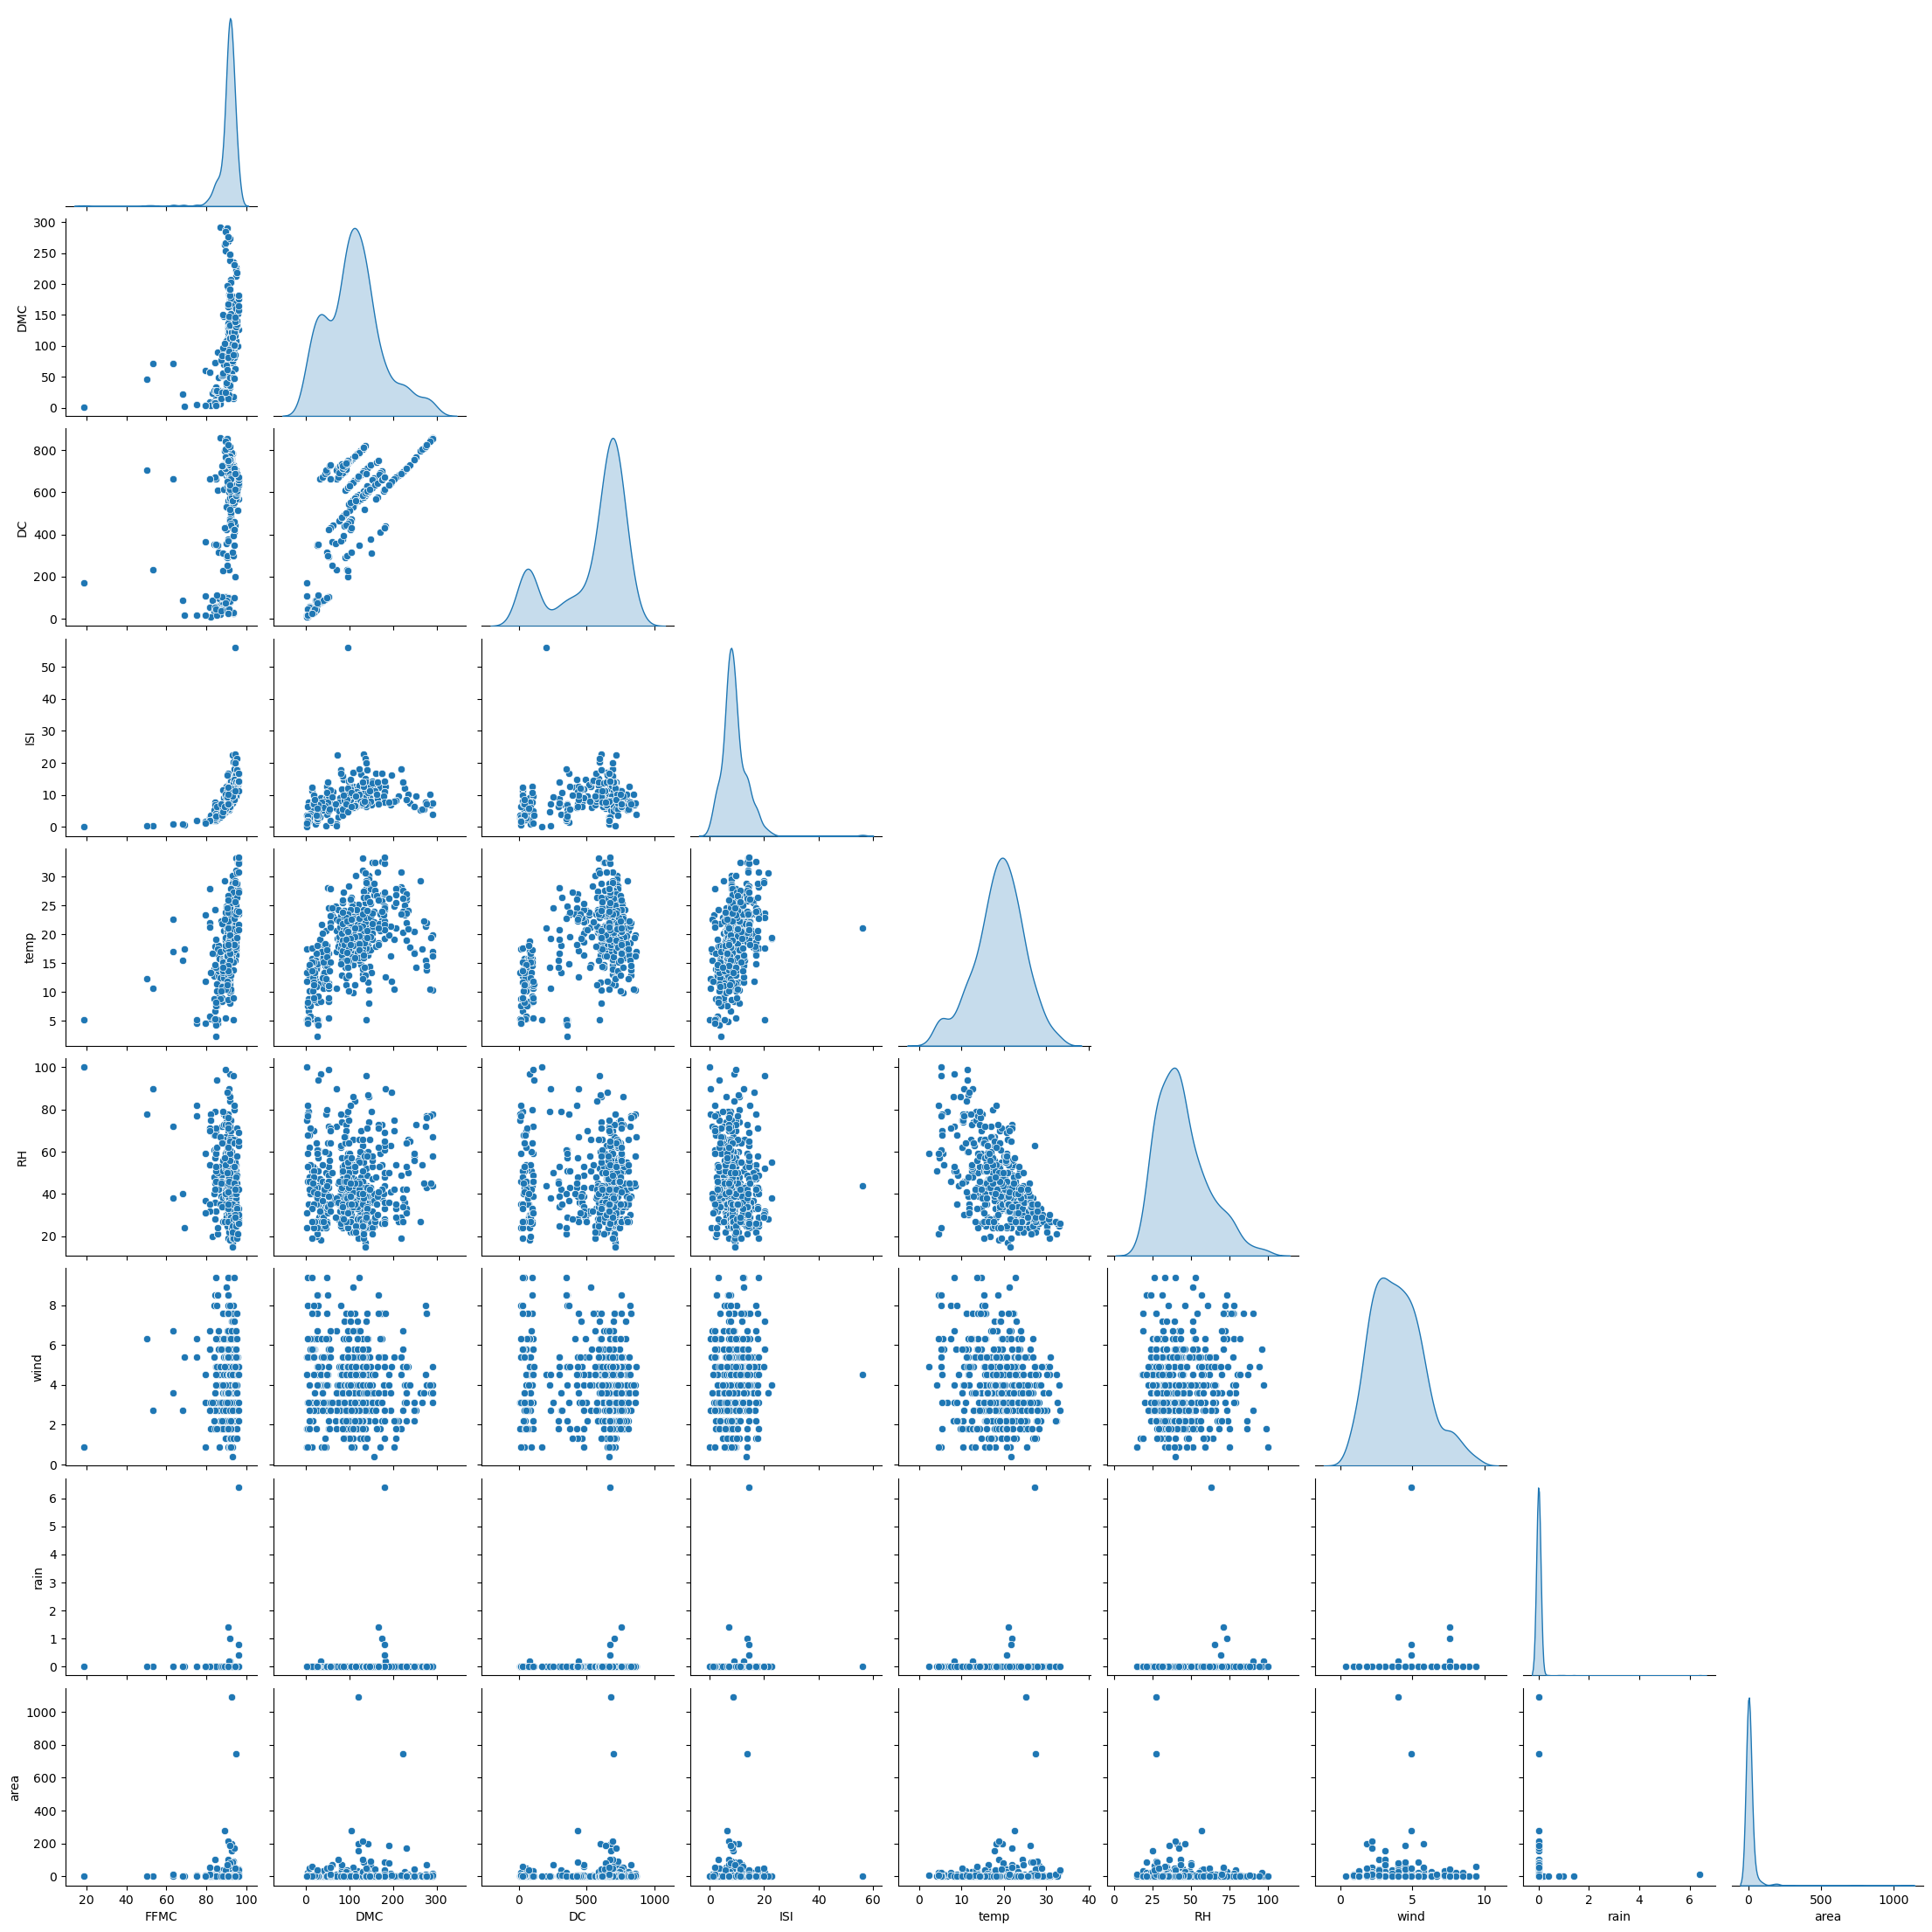

In [50]:
# Pairplot
sns.pairplot(Forest.iloc[:,:], corner = True, diag_kind = "kde")
# There is no corelation between the variables.

<AxesSubplot: >

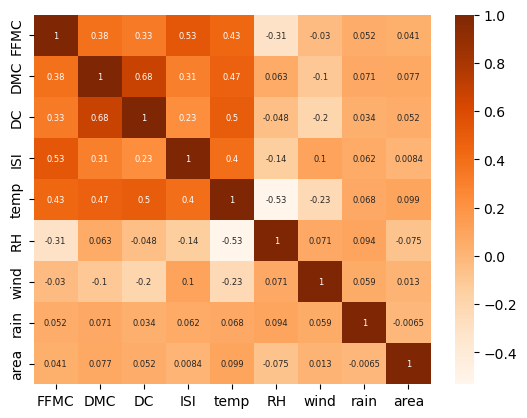

In [51]:
# Heat map and Correlation CoiForesticient
sns.heatmap(Forest.iloc[:,:].corr(), annot = True, annot_kws={"size": 6}, cmap = 'Oranges')
#WE CAN OBSERVE FROM ABOVE HEATMAP THERE IS NO CORRELATION IN BETWEEN OUTPUT AND INPUT FEATURES. SO WE CAN'T ABLE TO GET PROPER RESULT WITH HELP OF THIS INPUT FEATURE ONLY.

In [56]:
#DATA PRE PROCESSING:
#We dropped the day and month column.
#We normalized the data.
#We plotted pairplot and heatmap
Forest

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,0.927975,0.376071,0.633151,0.160848,0.535866,0.344158,0.401266,0.003193,0.011911
std,0.071684,0.219863,0.291071,0.081731,0.187816,0.192532,0.200103,0.046291,0.058793
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.922581,0.210889,0.504046,0.114082,0.424437,0.200000,0.255556,0.000000,0.000000
50%,0.940645,0.369400,0.769673,0.149733,0.549839,0.317647,0.400000,0.000000,0.000559
75%,0.957419,0.483115,0.827958,0.196078,0.662379,0.447059,0.500000,0.000000,0.006032
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
# Nomalization of data (as data contain binary value)
def norm_func(i):
    x = (i-i.min())	/ (i.max()-i.min())
    return (x)

In [54]:
Forest = norm_func(Forest.iloc[:,:])

In [55]:
Forest. describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,0.927975,0.376071,0.633151,0.160848,0.535866,0.344158,0.401266,0.003193,0.011911
std,0.071684,0.219863,0.291071,0.081731,0.187816,0.192532,0.200103,0.046291,0.058793
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.922581,0.210889,0.504046,0.114082,0.424437,0.200000,0.255556,0.000000,0.000000
50%,0.940645,0.369400,0.769673,0.149733,0.549839,0.317647,0.400000,0.000000,0.000559
75%,0.957419,0.483115,0.827958,0.196078,0.662379,0.447059,0.500000,0.000000,0.006032
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


0.000000    0.471513
0.001778    0.005894
0.001338    0.003929
0.009131    0.003929
0.010139    0.003929
              ...   
0.096861    0.001965
0.141982    0.001965
0.180118    0.001965
0.184207    0.001965
0.010231    0.001965
Name: area, Length: 251, dtype: float64

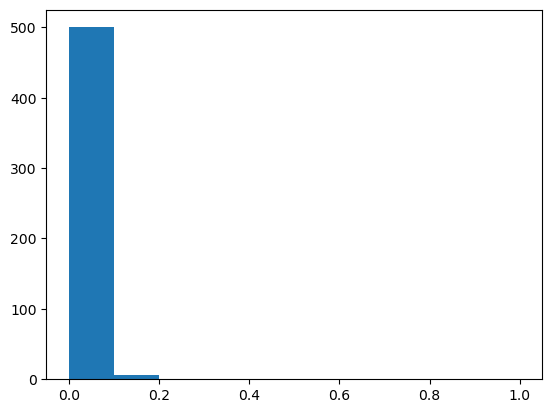

In [57]:
## - Splitting data -
# Splitting in X and y
X = Forest.drop(['area'],axis=1)
y = Forest['area']
plt.hist(y)
Forest.area.value_counts(normalize = True)

In [58]:
# Splitting in Train and Test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)

Kernel trick

The above explanation of SVM covered examples where blue and green classes are linearly separable. However, what if we wanted to apply SVMs to non-linear problems? How would we do that? This is where the kernel trick comes in. A kernel is a function that takes the original non-linear problem and transforms it into a linear one within the higher-dimensional space.

RBF Kernel is popular because of its similarity to K-Nearest Neighborhood Algorithm. It has the advantages of K-NN and overcomes the space complexity problem as RBF Kernel Support Vector Machines just needs to store the support vectors during training and not the entire dataset

In [59]:
# - Fitting Model-
# Fitting SVM Model
model = SVR(kernel = 'rbf', gamma = 1, epsilon = 0.01)
model.fit(X_train,y_train)

SVR(epsilon=0.01, gamma=1)

In [60]:
# Accuracy of Model on Train and Test data
model.score(X_train,y_train)
model.score(X_test,y_test)

-0.0038416633760471885

In [61]:
# Predication Train data and Test data
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [63]:
# RMSE Train data and Test data
rmse_train = np.sqrt(np.mean((pred_train-y_train)**2))
rmse_train
rmse_test = np.sqrt(np.mean((pred_test-y_test)**2))
rmse_test

0.08498677740547977

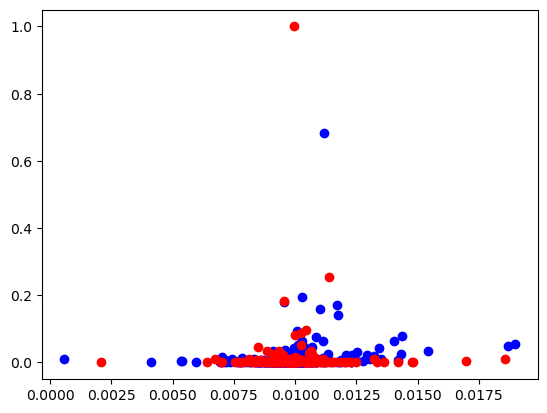

In [64]:
# Visualising Train data and Test data
plt.plot(pred_train,y_train,"bo")
plt.plot(pred_test,y_test,"ro")

The prediction on the train and test data plotted in the sctterplot shows that the area predicted is comparatively less than the area in the historical forest fire .
